In [72]:
"""!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install numpy 
!pip install -U scikit-learn
!pip install statsmodels"""

'!pip install pandas\n!pip install matplotlib\n!pip install seaborn \n!pip install numpy \n!pip install -U scikit-learn\n!pip install statsmodels'

CARGA Y LIMPIEZA DE DATOS

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [74]:
archivo = 'C:/Users/ymnl_/Downloads/Excel RRSS-Todos.xlsx'
df_rrss0 = pd.read_excel(archivo)
df_rrss0['Rural es mayor Urba'] = np.where(df_rrss0['POB_RURAL_INEI']-df_rrss0["POB_URBANA_INEI"] > 0, 'Si', 'No')
df_rrss0.head()

,IDDIST,NOMBDEP,NOMBPROV,NOMBDIST,NOM_CAPITAL (LEGAL),COD_ REG_NAT,REGION NATURAL,REGION_NATURAL,TIPO_MUNICIPALIDAD,POB_URBANA_INEI,...,CLASIFICACION_MUNICIPAL_MEF,GENERACION_MUN_TANIO,RRSS_INDUSTRIAL,QUEMA_RRSS,RRSS_SALUD,MicE,PE,ME,GE,Rural es mayor Urba
0,10104,AMAZONAS,CHACHAPOYAS,CHETO,CHETO,2,SIERRA,SIERRA,DISTRITAL,452,...,F,103.70,0,0,0,1.0,NaN,NaN,NaN,No
1,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,CHILIQUIN,2,SIERRA,SIERRA,DISTRITAL,156,...,G,35.79,0,0,0,1.0,NaN,NaN,NaN,Si
2,10106,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,CHUQUIBAMBA,2,SIERRA,SIERRA,DISTRITAL,464,...,G,106.45,0,0,0,1.0,NaN,NaN,NaN,Si
3,10516,AMAZONAS,LUYA,SAN CRISTOBAL,OLTO,2,SIERRA,SIERRA,DISTRITAL,422,...,E,63.95,0,0,0,1.0,NaN,NaN,NaN,No
4,10518,AMAZONAS,LUYA,SAN JERONIMO,PACLAS,2,SIERRA,SIERRA,DISTRITAL,192,...,G,44.05,0,0,0,1.0,NaN,NaN,NaN,Si


In [75]:
#df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].str.replace('.', '').str.replace(',', '.').astype(float)
for idx, col in enumerate (df_rrss0):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:QUEMA_RRSS
15,Nombre de la columna:RRSS_SALUD
16,Nombre de la columna:MicE
17,Nombre de la columna:PE
18,Nombre de la columna:ME
19,Nombre de la columna:GE
20,Nombre de la columna:Rural es mayor Urba


In [76]:
df_rrss=df_rrss0#[df_rrss0["Rural es mayor Urba"]=="Si"]

df_rrss['QUEMA_RRSS'] = df_rrss['QUEMA_RRSS'].astype(float)
df_rrss['RRSS_INDUSTRIAL'] = df_rrss['RRSS_INDUSTRIAL'].astype(float)
df_rrss['RRSS_SALUD'] = df_rrss['RRSS_SALUD'].astype(float)


df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)
df_rrss.iloc[:,16:20] = df_rrss.iloc[:,16:20].fillna(0)

#Convertirmos lo valores que queremos a tipo float
#df_rrss[["MiPyME-COMERCIO","GE-MANUFACTURA","MiPyME-MANUFACTURA","GENERACION_MUN_TANIO"]].astype(float)


#Agregamos las transformaciones con logaritrmo
df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"]+1)
df_rrss["Log Poblacion Rural"]=np.log(df_rrss["POB_RURAL_INEI"]+1)
df_rrss["Log Residuos solidos municipales"]=np.log(df_rrss["GENERACION_MUN_TANIO"]+1)


print(df_rrss.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            1472 non-null   int64  
 1   NOMBDEP                           1472 non-null   object 
 2   NOMBPROV                          1472 non-null   object 
 3   NOMBDIST                          1472 non-null   object 
 4   NOM_CAPITAL (LEGAL)               1472 non-null   object 
 5   COD_ REG_NAT                      1472 non-null   int64  
 6   REGION NATURAL                    1472 non-null   object 
 7   REGION_NATURAL                    1472 non-null   object 
 8   TIPO_MUNICIPALIDAD                1472 non-null   object 
 9   POB_URBANA_INEI                   1472 non-null   int64  
 10  POB_RURAL_INEI                    1472 non-null   int64  
 11  CLASIFICACION_MUNICIPAL_MEF       1472 non-null   object 
 12  GENERA

In [77]:
#transformamos a logaritmo todas las columnas para realizar la covarianza
cols_a_log=df_rrss.columns[16:20]
for col in cols_a_log:
    df_rrss[col + '_log'] = np.log(df_rrss[col]+1)

#Vemos en que posicion se encuentran nuestras columnas calculdadas    
for idx, col in enumerate (df_rrss):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:QUEMA_RRSS
15,Nombre de la columna:RRSS_SALUD
16,Nombre de la columna:MicE
17,Nombre de la columna:PE
18,Nombre de la columna:ME
19,Nombre de la columna:GE
20,Nombre de la columna:Rural es mayor Urba
21,Nombre de la columna:Log Poblacion Urbana
22,Nombre de la columna:Log Poblacion Rural
23,Nombre de la columna:Log Residuos solidos municipales
24,Nombre de la columna:MicE_log
25,Nombre de la columna:PE_log
26,Nombre de la columna:ME_lo

In [78]:
df_rrss_sinNaN= df_rrss.dropna(subset=["TIPO_MUNICIPALIDAD"])

#Vemos que categorías hay en tipo de municipalidad
muni= df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].unique()
print(muni)



['DISTRITAL' 'PROVINCIAL']


In [79]:
#Reemplazamos los valores de distrital y provincial
valores={"DISTRITAL":1,"PROVINCIAL":0}
df_rrss_sinNaN["TIPO_MUNICIPALIDAD CONT"]=df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].map(valores)
print(df_rrss_sinNaN)

      IDDIST     NOMBDEP     NOMBPROV       NOMBDIST NOM_CAPITAL (LEGAL)  \
0      10104    AMAZONAS  CHACHAPOYAS          CHETO               CHETO   
1      10105    AMAZONAS  CHACHAPOYAS      CHILIQUIN           CHILIQUIN   
2      10106    AMAZONAS  CHACHAPOYAS    CHUQUIBAMBA         CHUQUIBAMBA   
3      10516    AMAZONAS         LUYA  SAN CRISTOBAL                OLTO   
4      10518    AMAZONAS         LUYA   SAN JERONIMO              PACLAS   
...      ...         ...          ...            ...                 ...   
1467  221006  SAN MARTIN      TOCACHE    SANTA LUCIA         SANTA LUCIA   
1468  240101      TUMBES       TUMBES         TUMBES              TUMBES   
1469  240103      TUMBES       TUMBES        LA CRUZ         CALETA CRUZ   
1470  250201     UCAYALI      ATALAYA       RAIMONDI             ATALAYA   
1471  250301     UCAYALI   PADRE ABAD     PADRE ABAD            AGUAYTIA   

      COD_ REG_NAT REGION NATURAL REGION_NATURAL TIPO_MUNICIPALIDAD  \
0               

In [80]:
#Revisamos los estadísticos de las principales columnas a evaluar
print(df_rrss_sinNaN.describe())

              IDDIST  COD_ REG_NAT  POB_URBANA_INEI  POB_RURAL_INEI  \
count    1472.000000   1472.000000      1472.000000     1472.000000   
mean   105868.179348      2.088315      7432.146060     3454.966033   
std     67965.266836      0.765734     25065.393557     5399.692987   
min     10101.000000      1.000000        52.000000        0.000000   
25%     50301.750000      2.000000       473.250000      575.250000   
50%     90713.500000      2.000000      1152.000000     1690.500000   
75%    151008.250000      2.000000      3417.750000     4228.000000   
max    250401.000000      4.000000    406546.000000    82773.000000   

       GENERACION_MUN_TANIO  RRSS_INDUSTRIAL   QUEMA_RRSS   RRSS_SALUD  \
count           1472.000000      1472.000000  1472.000000  1472.000000   
mean            2062.013587         0.099185     0.356658     0.194293   
std             7797.283726         0.299012     0.479175     0.395790   
min               11.930000         0.000000     0.000000     0.

In [81]:
#Verificamos que columnas son las que presentan un valor nan
columnas_nan=df_rrss_sinNaN.isna().any()
print(columnas_nan)

IDDIST                              False
NOMBDEP                             False
NOMBPROV                            False
NOMBDIST                            False
NOM_CAPITAL (LEGAL)                 False
COD_ REG_NAT                        False
REGION NATURAL                      False
REGION_NATURAL                      False
TIPO_MUNICIPALIDAD                  False
POB_URBANA_INEI                     False
POB_RURAL_INEI                      False
CLASIFICACION_MUNICIPAL_MEF         False
GENERACION_MUN_TANIO                False
RRSS_INDUSTRIAL                     False
QUEMA_RRSS                          False
RRSS_SALUD                          False
MicE                                False
PE                                  False
ME                                  False
GE                                  False
Rural es mayor Urba                 False
Log Poblacion Urbana                False
Log Poblacion Rural                 False
Log Residuos solidos municipales  

ANALISIS EXPLORATORIO DE DATOS

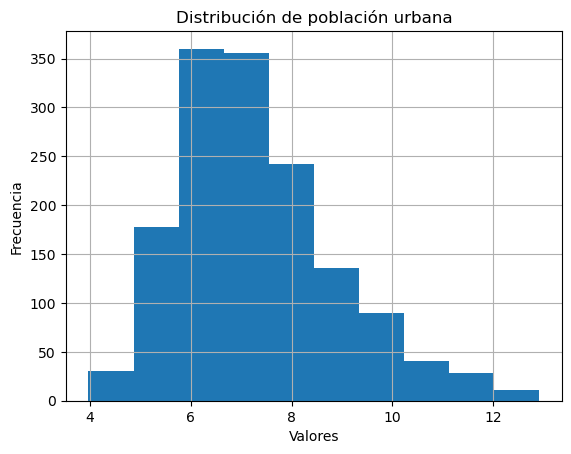

In [82]:
#Poblacion rural
df_rrss_sinNaN["Log Poblacion Urbana"].hist()
plt.title("Distribución de población urbana")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


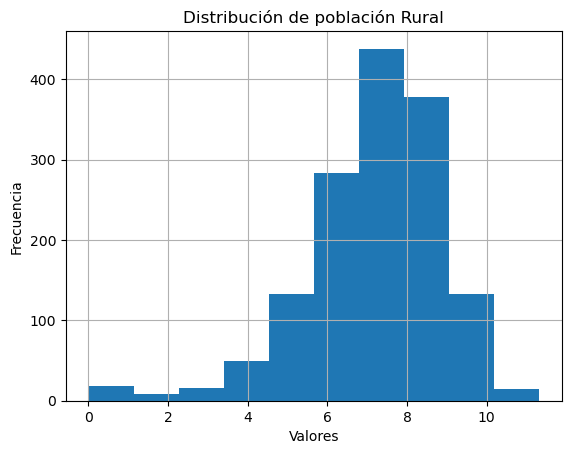

In [83]:
#Población urbana
df_rrss_sinNaN["Log Poblacion Rural"].hist()
plt.title("Distribución de población Rural")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


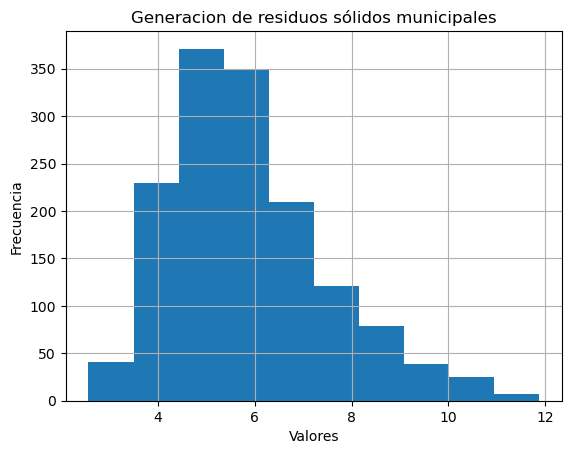

In [84]:
#Generacion de residuos municipales
df_rrss_sinNaN["Log Residuos solidos municipales"].hist()
plt.title("Generacion de residuos sólidos municipales")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

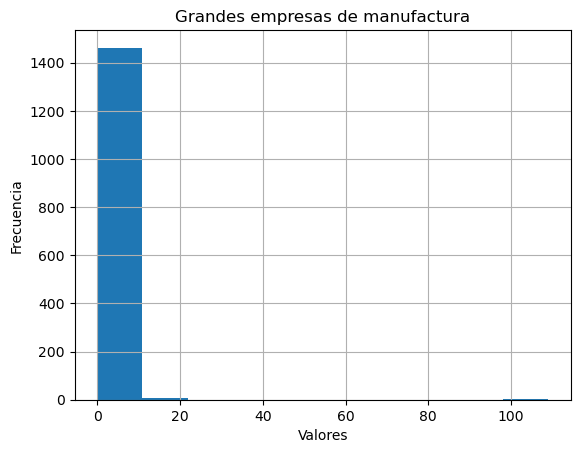

In [85]:
#Histograma de GE-Manufactura
df_rrss_sinNaN["GE"].hist()
plt.title("Grandes empresas de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

In [86]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()
plt.title("Mypimes de comercio")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()\nplt.title("Mypimes de comercio")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [87]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()
plt.title("Mypimes de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()\nplt.title("Mypimes de manufactura")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [88]:
columnas_pob_residuos=df_rrss_sinNaN[["RRSS_INDUSTRIAL",
                                        "QUEMA_RRSS",
                                        "RRSS_SALUD",
                                        "Log Poblacion Urbana",
                                        "Log Poblacion Rural",
                                        "Log Residuos solidos municipales"                    
                                    ]]

columnas_empresas=df_rrss_sinNaN.iloc[:,24:28]
df_var=pd.concat([columnas_pob_residuos,columnas_empresas], axis=1)            
print(df_var.info())


#Vemos en que posicion se encuentran nuestras columnas del data frame que vamos a trabajar    
for idx, col in enumerate (df_var):
    print(f"{idx},Nombre de la columna:{col}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RRSS_INDUSTRIAL                   1472 non-null   float64
 1   QUEMA_RRSS                        1472 non-null   float64
 2   RRSS_SALUD                        1472 non-null   float64
 3   Log Poblacion Urbana              1472 non-null   float64
 4   Log Poblacion Rural               1472 non-null   float64
 5   Log Residuos solidos municipales  1472 non-null   float64
 6   MicE_log                          1472 non-null   float64
 7   PE_log                            1472 non-null   float64
 8   ME_log                            1472 non-null   float64
 9   GE_log                            1472 non-null   float64
dtypes: float64(10)
memory usage: 115.1 KB
None
0,Nombre de la columna:RRSS_INDUSTRIAL
1,Nombre de la columna:QUEMA_RRSS
2,Nombre de la c

In [89]:
"""estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var)
cov_matrix = np.cov(estandarizar_variables, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=df_var.columns, columns=df_var.columns)
print(cov_df)"""

'estandarizar = StandardScaler()\nestandarizar_variables = estandarizar.fit_transform(df_var)\ncov_matrix = np.cov(estandarizar_variables, rowvar=False)\ncov_df = pd.DataFrame(cov_matrix, index=df_var.columns, columns=df_var.columns)\nprint(cov_df)'

In [90]:


"""# Crear el mapa de calor
plt.figure(figsize=(10, 8))
heatmap=sns.heatmap(cov_df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', mask=cov_df.isnull())

# Ajustar el tamaño de la fuente de las etiquetas de los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)
# Eliminar etiquetas en blanco
heatmap.set_xticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_xticklabels()])
heatmap.set_yticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_yticklabels()])

# Mostrar el mapa de calor
plt.title('Mapa de Calor de la Matriz de Covarianza')
plt.show()"""



"# Crear el mapa de calor\nplt.figure(figsize=(10, 8))\nheatmap=sns.heatmap(cov_df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', mask=cov_df.isnull())\n\n# Ajustar el tamaño de la fuente de las etiquetas de los ejes\nheatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)\nheatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)\n# Eliminar etiquetas en blanco\nheatmap.set_xticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_xticklabels()])\nheatmap.set_yticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_yticklabels()])\n\n# Mostrar el mapa de calor\nplt.title('Mapa de Calor de la Matriz de Covarianza')\nplt.show()"

In [91]:

#Todas las variables
X = df_var.iloc[:,list(range(3,10))]
y = df_var["QUEMA_RRSS"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.Logit(y, X).fit()

# Resumen del modelo
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.621059
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             QUEMA_RRSS   No. Observations:                 1472
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            7
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                 0.04668
Time:                        02:26:52   Log-Likelihood:                -914.20
converged:                       True   LL-Null:                       -958.97
Covariance Type:            nonrobust   LLR p-value:                 1.543e-16
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2286      0.575     -0.39

In [92]:
"""#Las variables con p<0.05
X=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",
"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", 
"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())"""


'#Las variables con p<0.05\nX=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",\n"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", \n"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]\ny = df_var["Log Residuos solidos municipales"]\n\n# Agregar una constante a las variables independientes\nX = sm.add_constant(X)\n\n# Ajustar el modelo de regresión lineal\nmodel = sm.OLS(y, X).fit()\n\n# Resumen del modelo\nprint(model.summary())'

Coeficientes: [ 0.         -0.0598048  -0.03514423  0.0939246   0.0303538   0.03031568
  0.03364656 -0.12527307]
Intercepto: 0.43219425079230683
MSE: 0.21540705619099465
R^2: 0.06121473758385254


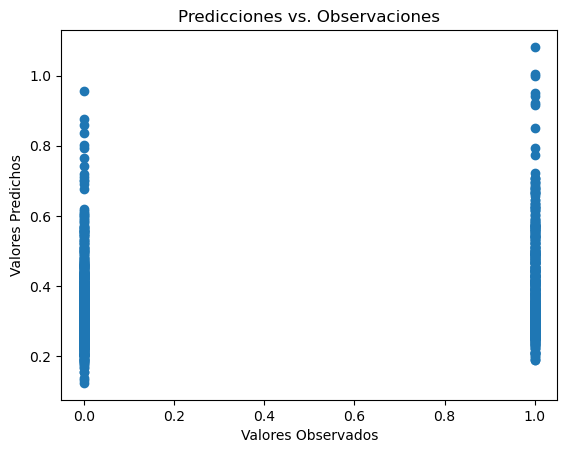

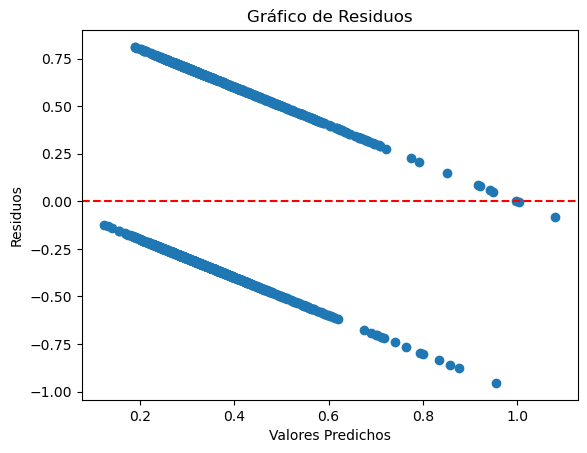

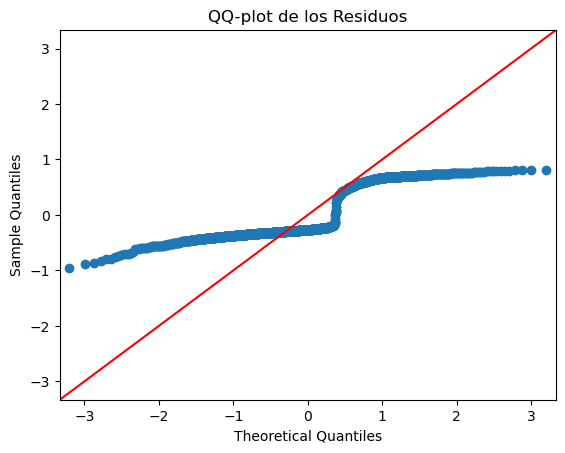

In [93]:
#Verificar la regresion:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes y el intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

# Predecir los valores de la variable dependiente
y_pred = modelo.predict(X)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

# Gráfico de Residuos
residuos = y - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#Grafico de qqplot
sm.qqplot(residuos, line='45')
plt.title('QQ-plot de los Residuos')
plt.show()

BUSQUEMOS UN PCA

In [94]:
columnas_sin_residuos=df_rrss_sinNaN[["Log Poblacion Urbana",
                                    "Log Poblacion Rural",                   
                                    ]]

columnas_empresas=df_rrss_sinNaN.iloc[:,22:26]
df_var_sin_rrss=pd.concat([columnas_sin_residuos,columnas_empresas], axis=1)            
print(df_var_sin_rrss)

#Vemos en que posicion se encuentran nuestras columnas del data frame que vamos a trabajar    
for idx, col in enumerate (df_var_sin_rrss):
    print(f"{idx},Nombre de la columna:{col}")

      Log Poblacion Urbana  Log Poblacion Rural  Log Poblacion Rural  \
0                 6.115892             5.537334             5.537334   
1                 5.056246             6.054439             6.054439   
2                 6.142037             7.285507             7.285507   
3                 6.047372             4.736198             4.736198   
4                 5.262690             6.006353             6.006353   
...                    ...                  ...                  ...   
1467              8.185907             7.886457             7.886457   
1468             11.640351             7.352441             7.352441   
1469              9.233080             6.431331             6.431331   
1470              9.810934            10.019892            10.019892   
1471             10.114720             8.480114             8.480114   

      Log Residuos solidos municipales  MicE_log    PE_log  
0                             4.651099  0.693147  0.000000  
1            

In [95]:
#Estandarizamos para nuestro PCA
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var_sin_rrss)
cov_matrix = np.cov(estandarizar_variables, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=df_var_sin_rrss.columns, columns=df_var_sin_rrss.columns)
print(cov_df)

                                  Log Poblacion Urbana  Log Poblacion Rural  \
Log Poblacion Urbana                          1.000680             0.231475   
Log Poblacion Rural                           0.231475             1.000680   
Log Poblacion Rural                           0.231475             1.000680   
Log Residuos solidos municipales              0.988844             0.239604   
MicE_log                                      0.852076             0.166427   
PE_log                                        0.758263             0.115277   

                                  Log Poblacion Rural  \
Log Poblacion Urbana                         0.231475   
Log Poblacion Rural                          1.000680   
Log Poblacion Rural                          1.000680   
Log Residuos solidos municipales             0.239604   
MicE_log                                     0.166427   
PE_log                                       0.115277   

                                  Log Residuos

In [96]:
#Creamos nuestro PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(estandarizar_variables)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'], index=df_rrss_sinNaN.index)
print(pca_df)

           PC1       PC2       PC3
0    -1.807053 -0.855041 -0.100980
1    -2.328834 -0.288807  0.513910
2    -1.349857  0.518673 -0.002313
3    -2.176076 -1.446561 -0.004746
4    -2.214262 -0.357538  0.397847
...        ...       ...       ...
1467  0.969627  0.335050 -0.423249
1468  5.834702 -1.783329  0.772103
1469  1.694634 -1.146852 -0.697238
1470  3.688304  1.316670 -0.306499
1471  3.939987 -0.152566  0.270333

[1472 rows x 3 columns]


[0.61423654 0.30646666 0.05169825]


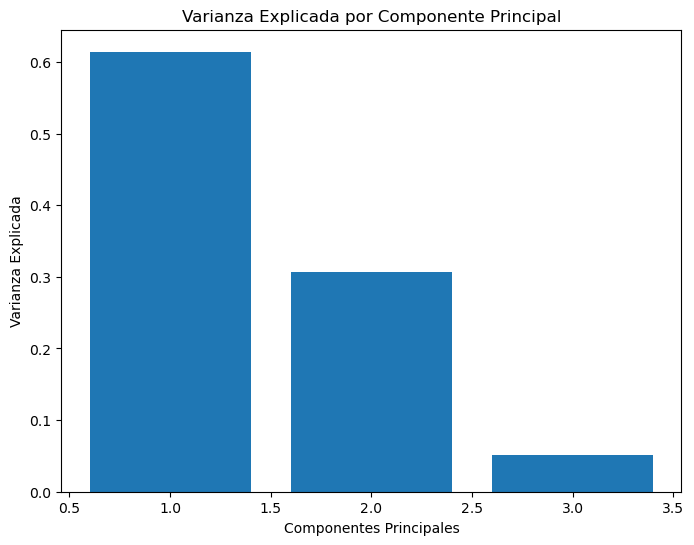

In [97]:
#Creames el gráfico de cargas
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

# Crear el gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [98]:
componentes_pca=pd.DataFrame(pca.components_,columns=df_var_sin_rrss.columns, index=['PC1', 'PC2','PC3'])
print(componentes_pca)

     Log Poblacion Urbana  Log Poblacion Rural  Log Poblacion Rural  \
PC1              0.493764             0.214943             0.214943   
PC2             -0.123198             0.671358             0.671358   
PC3             -0.442962             0.055091             0.055091   

     Log Residuos solidos municipales  MicE_log    PE_log  
PC1                          0.494614  0.473669  0.441351  
PC2                         -0.117179 -0.172043 -0.200126  
PC3                         -0.437994  0.159170  0.761933  


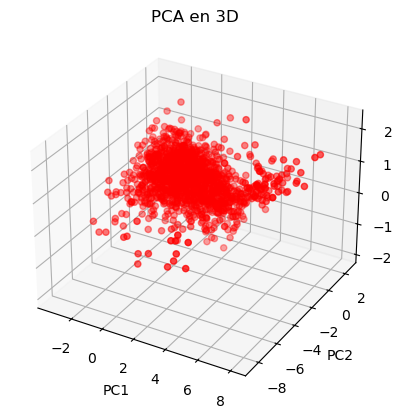

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title("PCA en 3D")

plt.show()


In [100]:
df_rrss_sinNaN_PCA= pd.concat([df_rrss_sinNaN, pca_df], axis=1)
print(df_rrss_sinNaN_PCA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            1472 non-null   int64  
 1   NOMBDEP                           1472 non-null   object 
 2   NOMBPROV                          1472 non-null   object 
 3   NOMBDIST                          1472 non-null   object 
 4   NOM_CAPITAL (LEGAL)               1472 non-null   object 
 5   COD_ REG_NAT                      1472 non-null   int64  
 6   REGION NATURAL                    1472 non-null   object 
 7   REGION_NATURAL                    1472 non-null   object 
 8   TIPO_MUNICIPALIDAD                1472 non-null   object 
 9   POB_URBANA_INEI                   1472 non-null   int64  
 10  POB_RURAL_INEI                    1472 non-null   int64  
 11  CLASIFICACION_MUNICIPAL_MEF       1472 non-null   object 
 12  GENERA

In [101]:
#Regresion para con el PCA:
#Todas las variables
X_pca = df_rrss_sinNaN_PCA.iloc[:,list(range(29,32))]
y1 = df_rrss_sinNaN_PCA["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X_pca = sm.add_constant(X_pca)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y1, X_pca).fit()

# Resumen del modelo
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Log Residuos solidos municipales   R-squared:                       0.986
Model:                                          OLS   Adj. R-squared:                  0.986
Method:                               Least Squares   F-statistic:                 3.540e+04
Date:                              Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                                      02:26:53   Log-Likelihood:                 357.56
No. Observations:                              1472   AIC:                            -707.1
Df Residuals:                                  1468   BIC:                            -685.9
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

Coeficientes: [ 0.          0.80394565 -0.19046281 -0.71191512]
Intercepto: 5.849497018428886
MSE: 0.03601982733052074
R^2: 0.9863660798227241


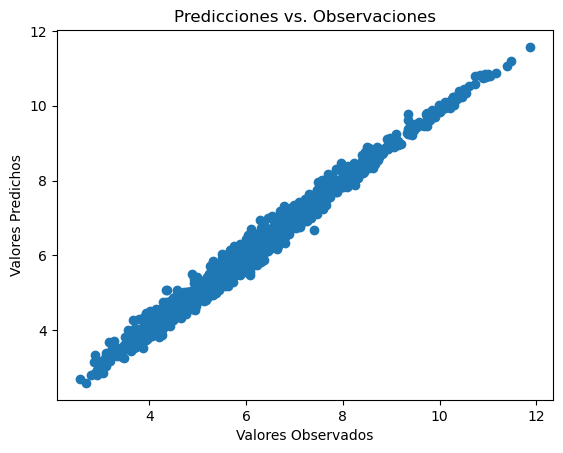

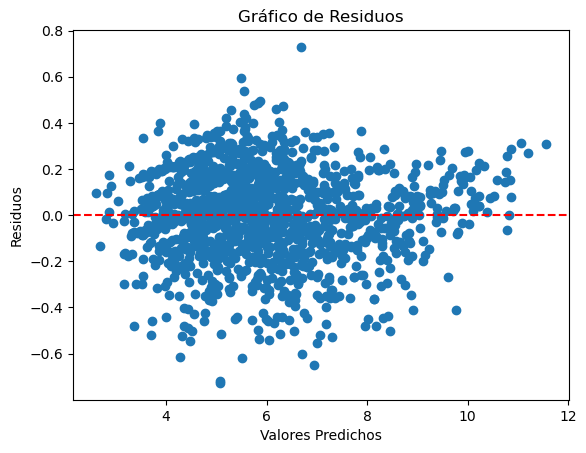

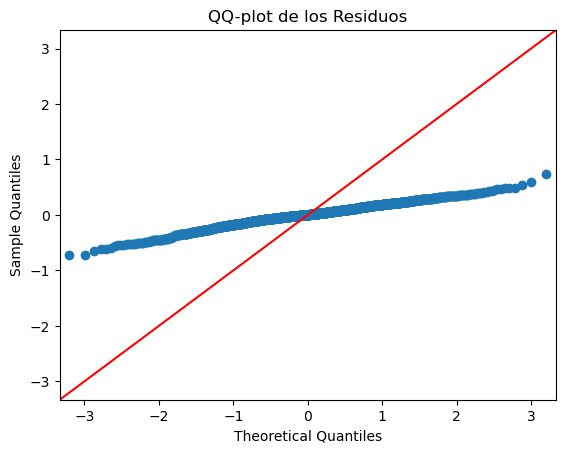

In [102]:
#regresión y supuestos:

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_pca, y1)

# Obtener los coeficientes y el intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

# Predecir los valores de la variable dependiente
y_pred = modelo.predict(X_pca)

# Evaluar el modelo
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y1, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

# Gráfico de Residuos
residuos = y1 - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#Grafico de qqplot
sm.qqplot(residuos, line='45')
plt.title('QQ-plot de los Residuos')
plt.show()

In [103]:
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from patsy import dmatrices

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_pca)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))



# Realizar la prueba de Shapiro-Wilk
shapiro_test = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', shapiro_test[0])
print('p-valor de Shapiro-Wilk:', shapiro_test[1])



{'LM Statistic': 2.704146244636135, 'LM-Test p-value': 0.4395231433227912, 'F-Statistic': 0.9005871025406935, 'F-Test p-value': 0.44019379789269053}
Estadístico de Shapiro-Wilk: 0.988398999759712
p-valor de Shapiro-Wilk: 1.9231430001881763e-09


EVALUAR VECINO MÁS CERCANO

MSE: 0.28135593220338984
R^2: -0.1905572303802392
Importancia de Log Poblacion Urbana: -0.057535630544479924
Importancia de Log Poblacion Rural: 0.03697580688731135
Importancia de Log Residuos solidos municipales: 0.013387792148854216
Importancia de MicE_log: -0.10997114979415852
Importancia de PE_log: -0.005737625206651664
Importancia de ME_log: 0.04813230034468978
Importancia de GE_log: 0.04223529666007551


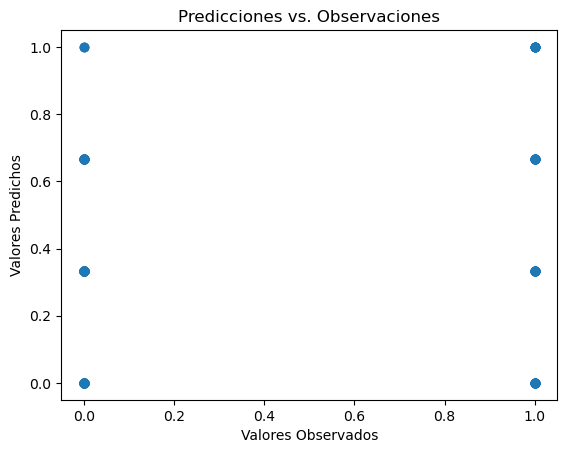

In [107]:
#Evaluar con regresion de vecino más cercano
#Dividimos los datos en conjunto de entrenamiento y prueba
X_vmc = df_var.iloc[:,list(range(3,10))]
y_vmc = df_var["QUEMA_RRSS"]

X_train, X_test, y_train, y_test = train_test_split(X_vmc, y_vmc, test_size=0.2, random_state=42)

#Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo k-NN con k=3 (puedes ajustar este valor)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

#Hacemos predicciones y evaluamos el modelo:
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Evaluar la importancia de las características mediante permutación
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Mostrar la importancia de las características
for i, col in enumerate(X_vmc.columns):
    print(f'Importancia de {col}: {importance[i]}')
# Gráfico de Predicciones vs. Observaciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

ARBOLES DE DECISION

Importancia de const: 0.0
Importancia de Log Poblacion Urbana: 0.21457319682882411
Importancia de Log Poblacion Rural: 0.30768495317383737
Importancia de Log Residuos solidos municipales: 0.24321056401117752
Importancia de MicE_log: 0.12914196474300343
Importancia de PE_log: 0.05379197504544288
Importancia de ME_log: 0.027526299300243598
Importancia de GE_log: 0.024071046897471107
MSE en conjunto de prueba: 0.23418237288135593
R^2 en conjunto de prueba: 0.009057619371778736


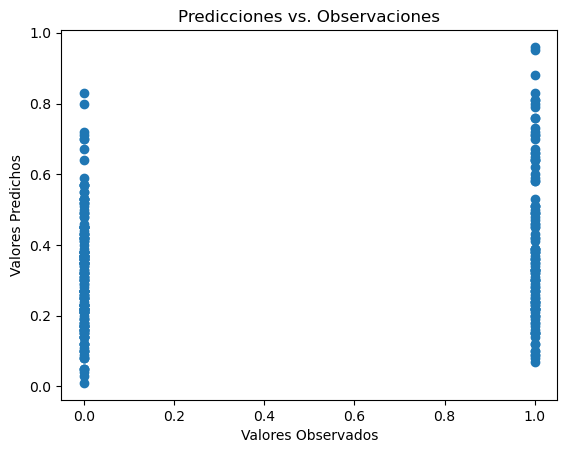

In [108]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar el modelo de Bosques Aleatorios
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluar la importancia de las características
importances = rf.feature_importances_
for i, col in enumerate(X.columns):
    print(f'Importancia de {col}: {importances[i]}')

# Hacer predicciones y evaluar el modelo
y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE en conjunto de prueba:", mse)
print("R^2 en conjunto de prueba:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

REALIZAMOS CLUSTERIZACIÓN

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_23476\380815238.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_DBSCAN['cluster'] = clusters


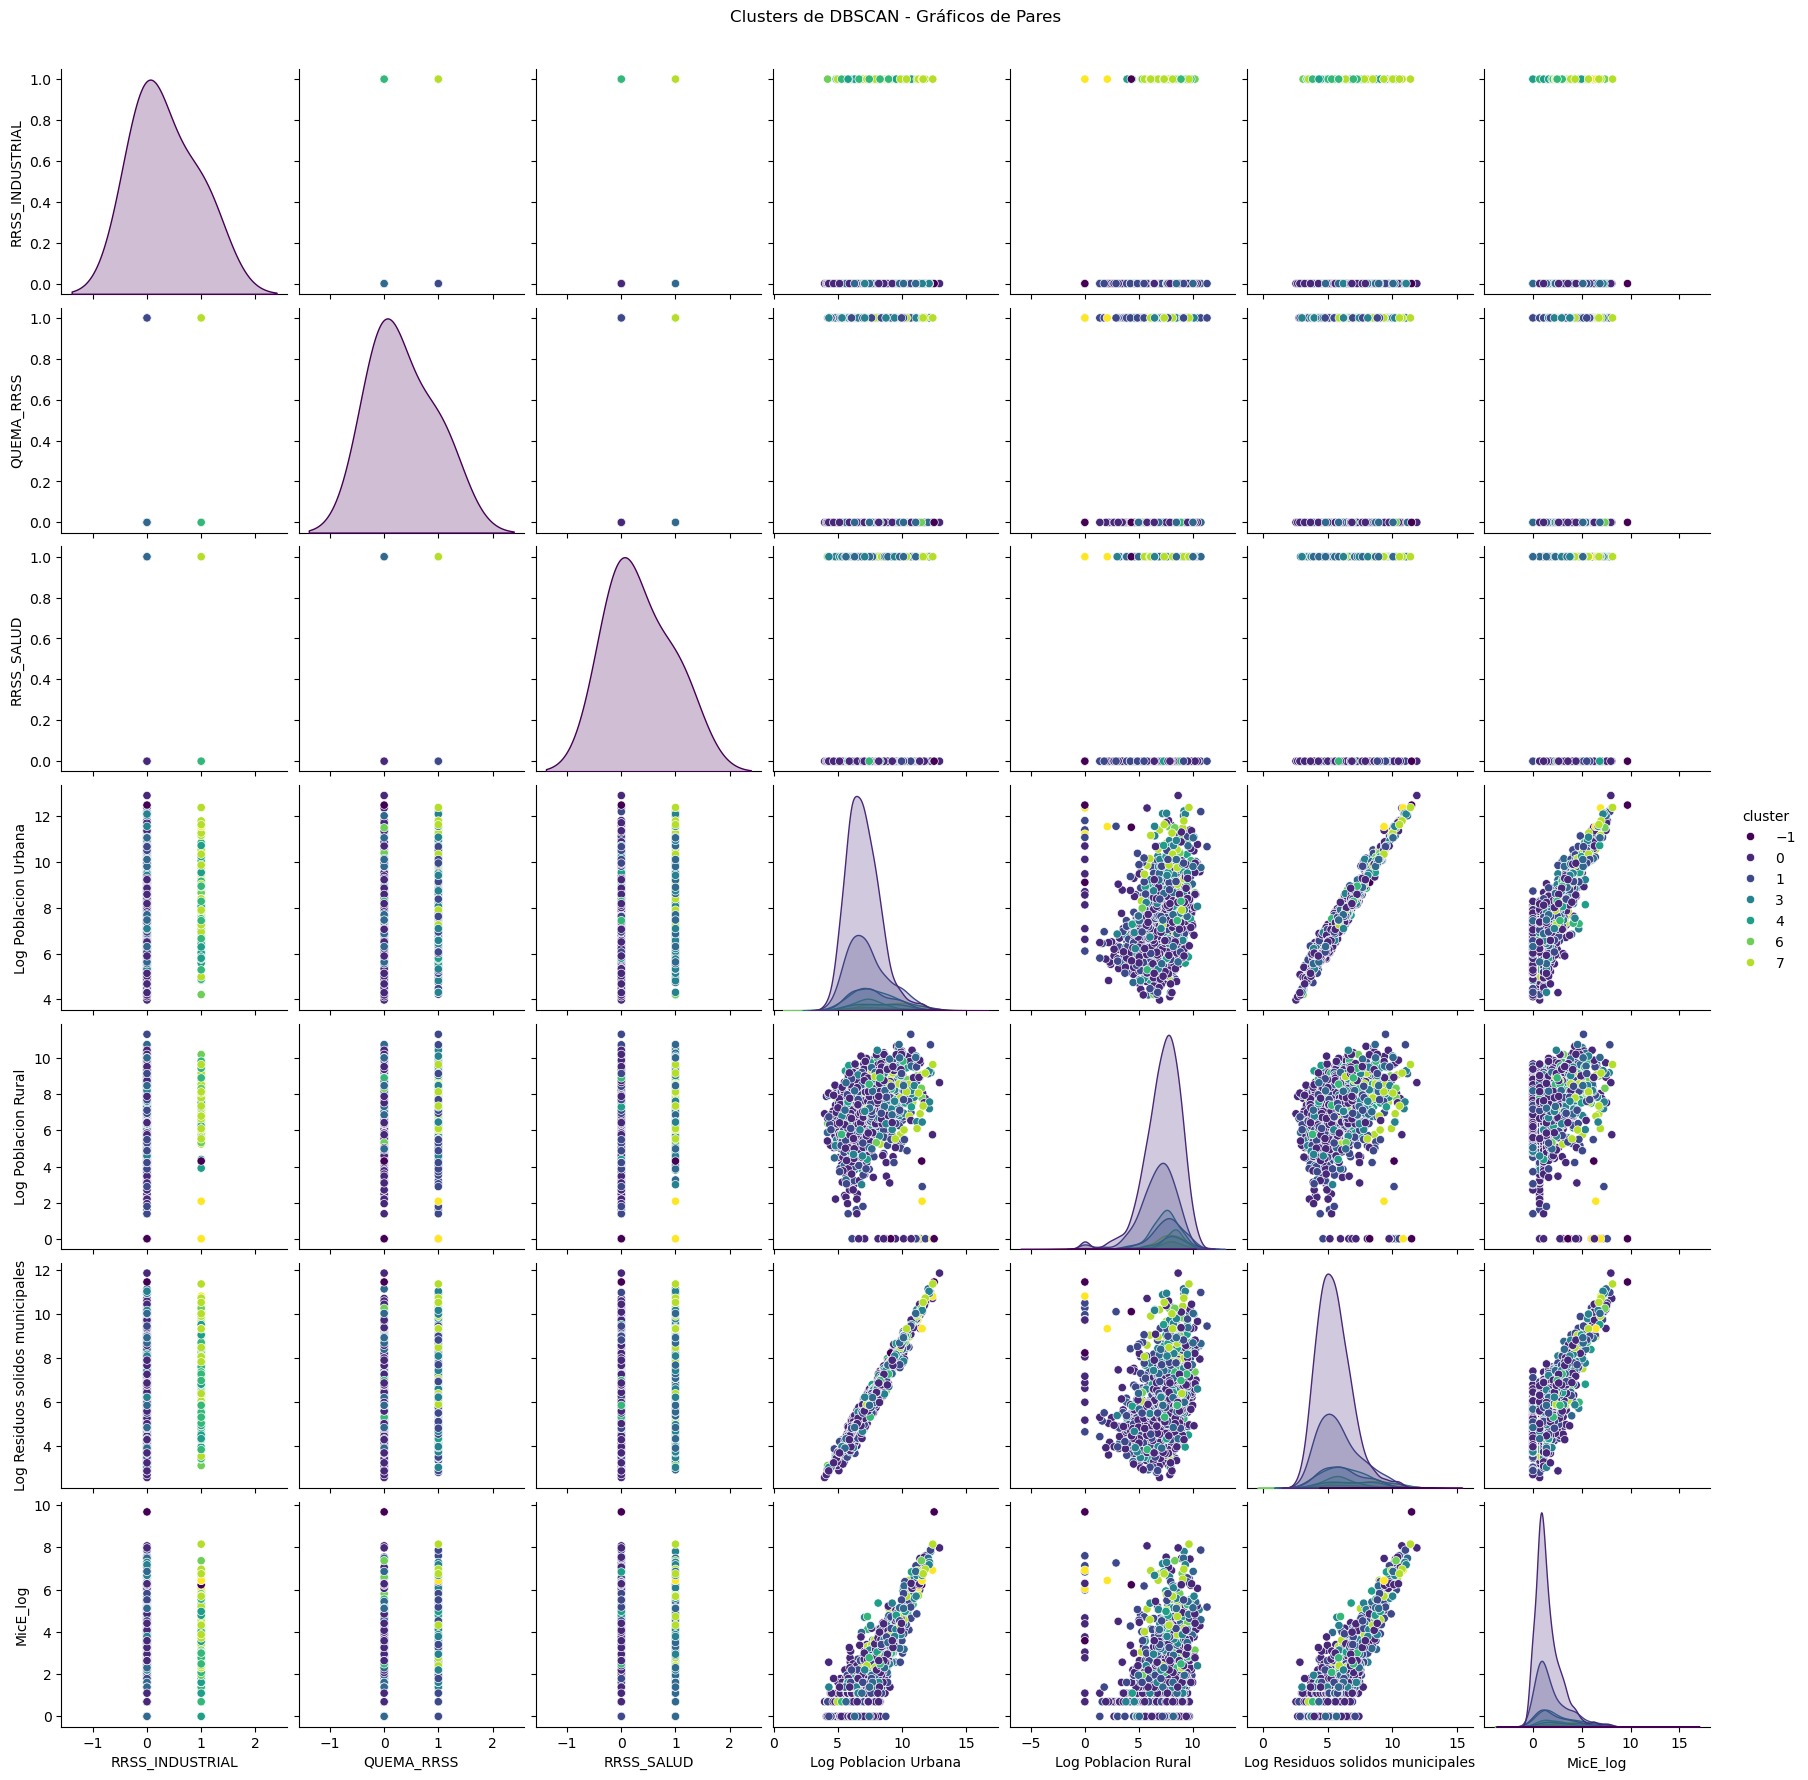

Silhouette Score: 0.3071700674964529
Davies-Bouldin Index: 1.5062729386228912
Número de Outliers: 3


In [109]:
#Regresion para con el PCA:
#Todas las variables
#Todas las variables
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score


scaler = StandardScaler()

X_DBSCAN = df_var.iloc[:,list(range(0,7))]
X_scaled = scaler.fit_transform(X_DBSCAN)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)

# Añadir los clusters al DataFrame
X_DBSCAN['cluster'] = clusters

# Visualizar los clusters
#plt.scatter(X['poblacion'], X['residuos_solidos'], c=X['cluster'], cmap='viridis')
sns.pairplot(X_DBSCAN, hue='cluster', palette='viridis')
plt.suptitle('Clusters de DBSCAN - Gráficos de Pares', y=1.02)
plt.show()


#Evaluar el modelo
sil_score = silhouette_score(X_scaled, clusters)
db_index = davies_bouldin_score(X_scaled, clusters)
n_outliers = list(clusters).count(-1)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_index)
print("Número de Outliers:", n_outliers)
